# Week 5 - Support Vector Machines
# Part 1
### Introduction
In this exercise, you will implement support vector machines (SVMs) with various example 2-d datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. 

To get started with this exercise, you will need to download the Week 5 folder from the github or dropbox.
<br>

### External files included for this exercise
 - $\texttt{data/wk6_x1.npy}$ - Linearly seprable dataset
 - $\texttt{data/wk6_y1.npy}$ - Linearly seprable dataset labels
 - $\texttt{data/wk6_x2.npy}$ - Not so linearly seprable dataset
 - $\texttt{data/wk6_y2.npy}$ - Not so linearly seprable dataset labels
 - $\texttt{data/wk6_x3.npy}$ - Final dataset
 - $\texttt{data/wk6_3.npy}$ - Final labels
 - $\texttt{utils/plot_utils.py}$ - Matplotlib scripts

In [1]:
import sys
sys.path.append('../')
%matplotlib inline
from utils.plot_utils import display_2d_binary, display_boundary_linear, display_boundary_nonlinear
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.io as sio
from sklearn import svm

## 1 - Example dataset 1
Lets kick off with a 2-d example dataset that can be separated by a linear boundary. The cell below will plot the training data for you with positive examples indicated by (+) and negative examples indicated by (o). However, notice that there is an outlier positive example + on the far left near (0.1,4.1). As part of this exercise, we will explore how this outlier affects the SVM decision bounary. 

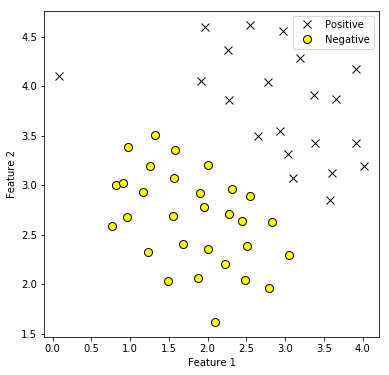

In [2]:
X1 = np.load('../data/wk6_x1.npy')
y1 = np.load('../data/wk6_y1.npy').ravel()
fig=display_2d_binary(X1,y1)

### 1.1 - Regularization parameter in the SVM 
In this part of the exercise, you will try using different values of the $C$ parameter with SVMs. Informally, the $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. If you recall our work with regularized logistic regression, this $C$ parameter is the way we implemented regularization with `sklearn`, instead of using $\lambda$. 

**Exercise**: Train a linear support vector machine to classify the sample dataset using a regularization parameter of $C=1$ and $C=100$. 
<br>
*Note*: We have already imported the `sklearn` package `svm`. The documentation for the 'support vector classifier' in this package is given here: 
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
<br> 
Why not try something like this...
```python
clf=svm.SVC(C=1,kernel='linear',tol=1e-3)
clf.fit(X1,y1)
```


In [3]:
### START CODE HERE ###

### END CODE HERE ###

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

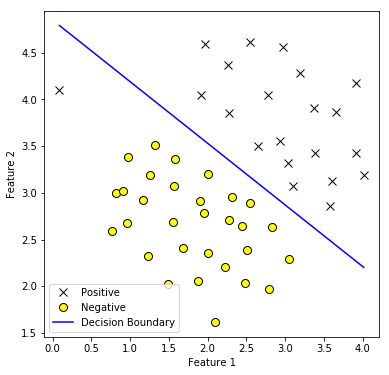

In [4]:
fig=display_boundary_linear(X1,y1,clf)

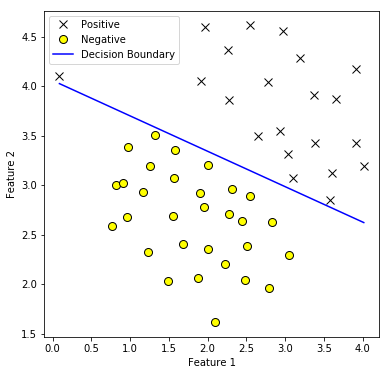

In [5]:
# And again for C=100
### START CODE HERE ###

### END CODE HERE ###
fig=display_boundary_linear(X1,y1,clf)

#### What can we learn?
While a low value of $C$ mis-classifies one of our training examples, a high value of $C$ that practically removes regularization does not produce a natural fit, and would probably limit the robustness of our model with unseen data.

## 2 - SVM with Gaussian Kernels 
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.
### 2.1 - Gaussian Kernel
To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples, ($x^{(i)}$,$x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart. The Gaussian kernel function is defined as
\begin{equation*}
K_{gaussian}(x^{(i)},x^{(j)}) = \exp \left(- \frac{\left\lVert x^{(i)}-x^{(j)} \right\rVert^2}{2\sigma^2}\right)=
\exp \left(- \frac{ \sum_{k=1}^n(x^{(i)}-x^{(j)} )^2}{2\sigma^2}\right)
\end{equation*}

**Exercise**: You should now complete the code in `gaussian_kernel()` to compute the Gaussian kernel between two examples, ($x^{(i)}$,$x^{(j)}$).

In [6]:
def gaussian_kernel(x1,x2,sigma):
    '''
    Gaussian kernel function.

    Inputs
    ================
    x1 : column like vector
    x2 : column like vector
    sigma : bandwith parameter
    
    Returns
    ================
    sim : gaussian similarity function between x1 and x2
    '''
    
    ### START CODE HERE ###

    ### END CODE HERE ###
    return sim
tmp1= np.array([1,2,1]); tmp2 = np.array([0,4,-1]); sigma=2;
print(gaussian_kernel(tmp1,tmp2,sigma))

0.32465246735834974


Expected result: 0.32465246735834974


### 2.2 - Nonlinear example dataset
Now lets load a new dataset. From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset.
While we had you program the Gaussian kernel above, this was merely an exercise, since this comes pre-loading in sklearn. 
*As a test of your ability, try an modify the gaussian_kernel function according to the sklearn documentation and use it as a custom kernel.*


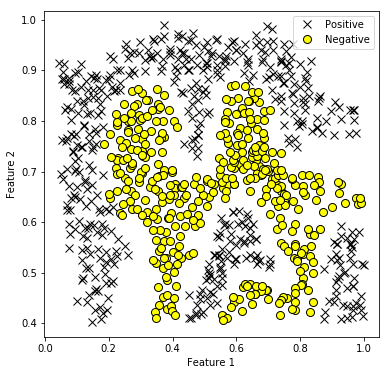

In [7]:
X2 = np.load('../data/wk6_x2.npy')
y2 = np.load('../data/wk6_y2.npy').ravel()
fig=display_2d_binary(X2,y2)

`sklearn` uses the formalism of a radial basis function defined as rbf: $\exp(-\gamma \|x-x'\|^2)$. So in this case, $\gamma = 1/2\sigma^2$. Try out the following for a narrow Gaussian kernel:
```python
clf=svm.SVC(C=1,kernel='rbf',gamma=50,tol=1e-3)
```

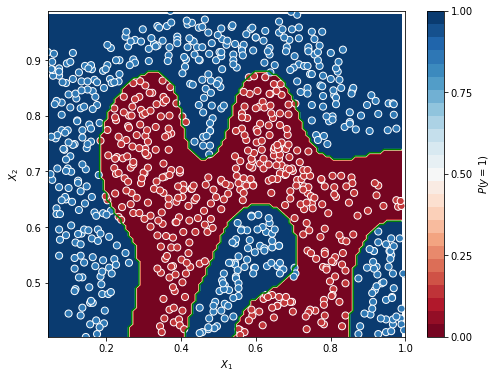

In [8]:
### START CODE HERE ###

### START CODE HERE ###
fig = display_boundary_nonlinear(X2,y2,clf)

In [9]:
print(clf.score(X2,y2))

0.9895712630359212


### 2.3 - Cross validation
One last time with a fresh new dataset. In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. In the provided dataset you are given the variables `x`, `y`, `x_val`, and `y_val`. 

Your task is to use the cross-validation set `x_val` and `y_val` to determine the most robust $C$ and $\sigma$ parameters to use. You should write any aditional code necessary to help you search over the parameters $C$ and $\sigma$. For *both* $C$ and $\sigma$ we suggest a logarithmic grid search (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). You need to try all possible pairs of values for $C$ and $\sigma$, thus if you attempted all 8 values listed above, you would end up training and evaluating (on the cross-validation set) a total of $8^2=64$ different models. In the end you just keep the best perfomer on the validation set. 

Remember that while we are searching over $\sigma$, `sklearn` takes an input $\gamma=1/2\sigma^2$.  

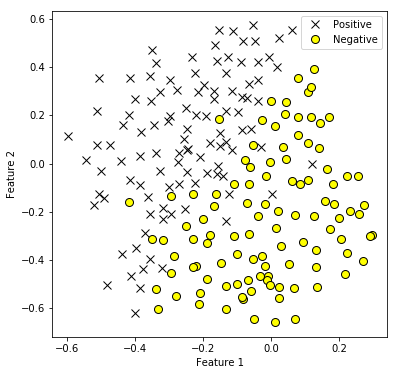

In [11]:
x = np.load('../data/wk6_x3.npy')
y = np.load('../data/wk6_y3.npy').ravel()
x_val= np.load('../data/wk6_xval.npy')
y_val = np.load('../data/wk6_yval.npy').ravel()
fig=display_2d_binary(x,y)

**Exercise**: Following the comments below, search over the parameter space to develop the model that best performs on the validation data. 

In [12]:
def parameters_search(x,y,x_val,y_val):
    '''
    Gaussian kernel function.

    Inputs
    ================
    x : train data
    y : train labels
    x_val : validation data
    y_val : validation labels
    
    Returns
    ================
    C : regularization parameter from best validation model
    gamma : gamma bandwith from best validation model
    '''
    
    # Perhaps you should consider looping over these lists
    trial_Cs = [10**(a) for a in np.arange(-2,2,.5)]
    trial_sigmas = [10**(a) for a in np.arange(-2,2,.5)]
    # I'll set up gammas for you
    trial_gammas = [1/(2*sigma**2) for sigma in trial_sigmas]
    
    C = None
    gamma = None
    best_score =0
    ### START CODE HERE ###
    
    # First set up a for loop over the trial C's
    
        #Then set up a for loop over the trial gammas
        
            # Instantiate the svm.SVC model, then call fit on the training data
            
            
            # Next calculate the score using the validation data, and set it to temporary variable
            
            # Check if this temporary score is greater than the previous best
            # If it is, overwrite the score and saved C and gamma
            
            
            
            
    ### END CODE HERE ###
    
    return C, gamma
final_C, final_gamma = parameters_search(x,y,x_val,y_val) 

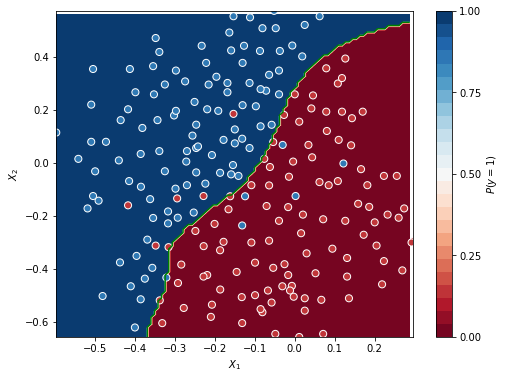

In [13]:
clf=svm.SVC(C=final_C,gamma=final_gamma)
clf.fit(x,y)
fig = display_boundary_nonlinear(x,y,clf)

# Congratulations!
You've learned how to implement a Gaussian support vector machine, and fine-tune its parameters to satisfy a cross-validation dataset. 

Hopefully you've made note of how fast the training is, thus explaining some of the advantages of SVMs. More importantly, what you've learned here can be applied to multi-class classification and over any arbitrary feature vector! 

The rest of Andrew Ng's examples in Octave show off the early years of natural language processing by implementing SVMs to classify spam emails. Unfortunately we wont have time to work through all of this; however, feel free to take a look at how the body of an email can be converted into a feature vector by counting the most frequent words. From there it is the exact same binary classifcation we have here. 